In [35]:
import sys
import json
from collections import defaultdict
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon, Rectangle, FancyBboxPatch
from matplotlib import patheffects
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec

sys.path.append('..')
from tools import get_shapes

In [36]:
shapes = get_shapes('00000138.json', xywh=True)

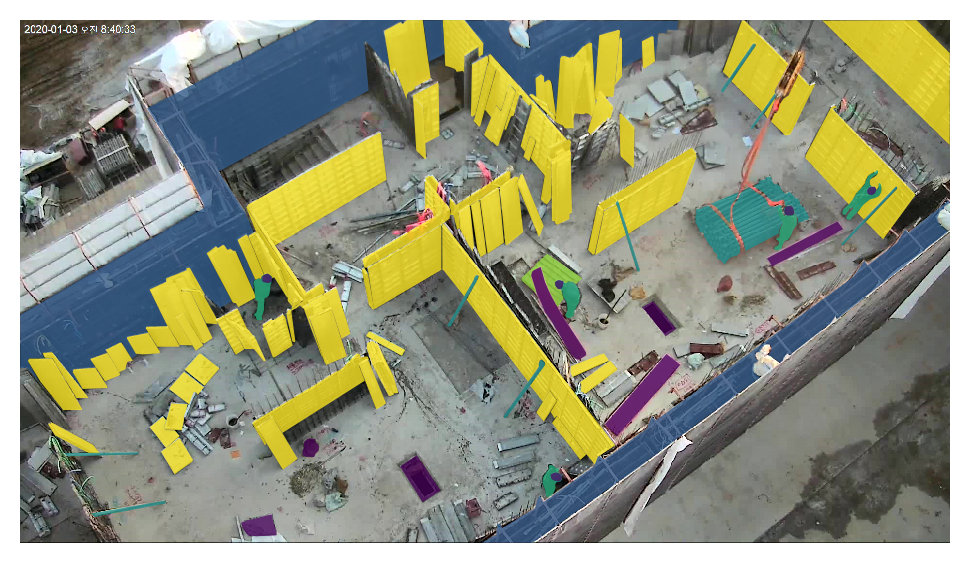

In [50]:
colors_map = {
    'gang form': 60,
    'person': 127,
    'panel': 200,
    'support': 99,
    'hardhat': 9,
    'pallet': 168
}

fig, ax = plt.subplots(dpi=200)

image = Image.open('00000138.jpg')
ax.imshow(image)

patches = []
colors = []
for shape in shapes['polygons']:
    polygon = Polygon(np.asarray(shape['points']), True)
    patches.append(polygon)
    colors.append(colors_map.get(shape['label'], 1))

pc = PatchCollection(patches, alpha=0.8)
pc.set_array(np.array(colors))
ax.add_collection(pc)
ax.axis('off') 
plt.show()

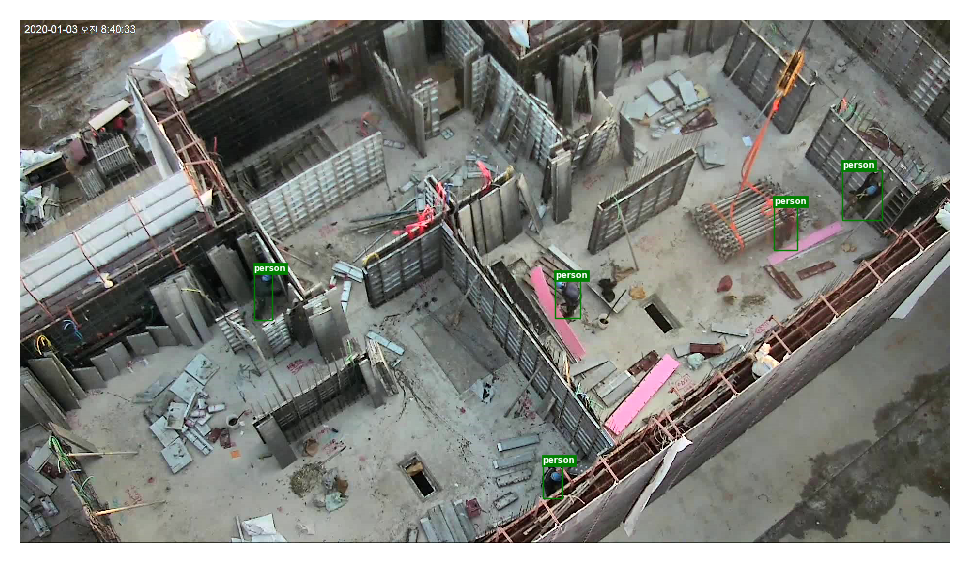

In [51]:
fig, ax = plt.subplots(dpi=200)

image = Image.open('00000138.jpg')
ax.imshow(image)

rectangles = []
for shape in shapes['boxes']:
    if shape['label'] in ['person']:
        box = shape['points']
        rectangle = Rectangle((box[0], box[1]), box[2], box[3])
        rectangles.append(rectangle)

        ax.annotate(
            shape['label'], (box[0], box[1]), color='w', weight='bold', 
            fontsize=3, ha='left', va='bottom', 
            bbox=dict(facecolor='g', edgecolor='g', pad=0.0))
        
pc = PatchCollection(rectangles, edgecolor='g', lw=0.5, facecolor='none')
ax.add_collection(pc)
ax.axis('off')
plt.show()

In [52]:
def draw_plot1(ax):
    image = Image.open('00000138.jpg')
    ax.imshow(image)

    patches = []
    colors = []
    for shape in shapes['polygons']:
        polygon = Polygon(np.asarray(shape['points']), True)
        patches.append(polygon)
        colors.append(colors_map.get(shape['label'], 1))

    pc = PatchCollection(patches, alpha=0.8)
    pc.set_array(np.array(colors))
    ax.add_collection(pc)
    ax.axis('off')

In [53]:
def draw_plot2(ax):
    for shape in shapes['polygons']:
        if shape['label'] == 'person': 
            points = np.asarray(shape['points'])
            if np.max(points[:,0]) > 1680:
                polygon = points

    polygon[:, 0] = polygon[:, 0] - 1680
    polygon[:, 1] = polygon[:, 1] - 300

    xs = []
    ys = []
    for p in polygon:
        xs.append(p[0])
        ys.append(p[1])

    x_min, x_max = np.min(polygon[:, 0]), np.max(polygon[:, 0]-17)
    y_min, y_max = np.min(polygon[:, 1]), np.max(polygon[:, 1]-9)

    box = [x_min, y_min, x_max, y_max]
    
    image = Image.open('00000138.jpg')
    # left, upper, right, and lower
    coord = (1680, 300, 1797, 423)
    image = image.crop(coord)

    ax.imshow(image, alpha=0.1)

    patches = [Polygon(np.asarray(polygon), True)]
    colors = [colors_map.get('person', 1)]
    pc = PatchCollection(patches, alpha=0.5)
    pc.set_array(np.array(colors))
    ax.add_collection(pc)

    line = Line2D(
        np.asarray(polygon)[:, 0], np.asarray(polygon)[:, 1], 
        linewidth=0.5, color='black', markersize=3., marker='o', markeredgecolor='none', markeredgewidth=.5)#markeredgecolor='r')
    ax.add_line(line)

    rectangles = [FancyBboxPatch((box[0], box[1]), box[2], box[3], boxstyle='square,pad=0.')]
    pc = PatchCollection(rectangles, edgecolor='black', lw=1.8, ls='--', facecolor='none') #path_effects=[patheffects.withStroke(linewidth=2.3, foreground='w')]) #alpha=0.2)
    ax.add_collection(pc)

    boxes = [
        [box[0], box[1]],
        [box[0]+box[2], box[1]],
        [box[0], box[1]+box[3]],
        [box[0]+box[2], box[1]+box[3]]
    ]

    texts = ['(min x, min y)', '(max x, min y)', '(min x, max y)', '(max x, max y)']
    va = 'bottom'
    offset = -1.5
    for i, (box, text) in enumerate(zip(boxes, texts)):
        ax.scatter(box[0], box[1], c='black', s=10,)# ec='w', lw=0.5)
        if i > 1:
            va = 'top'
            offset = 1.5

        ax.annotate(
            text, (box[0], box[1]+offset), color='black', weight='bold', 
            fontsize=7, ha='center', va=va, )#path_effects=[patheffects.withStroke(linewidth=.9, foreground='gray')]) #bbox=dict(facecolor='r', edgecolor='r', pad=0.0))

    ax.axis('off')

In [54]:
def draw_plot3(ax):
    image = Image.open('00000138.jpg')
    ax.imshow(image)

    rectangles = []
    for shape in shapes['boxes']:
        if shape['label'] in ['person']:
            box = shape['points']
            rectangle = Rectangle((box[0], box[1]), box[2], box[3])
            rectangles.append(rectangle)

            ax.annotate(
                shape['label'], (box[0], box[1]), color='w', weight='bold', 
                fontsize=3, ha='left', va='bottom', 
                bbox=dict(facecolor='g', edgecolor='g', pad=0.0))

    pc = PatchCollection(rectangles, edgecolor='g', lw=0.5, facecolor='none')
    ax.add_collection(pc)
    ax.axis('off')

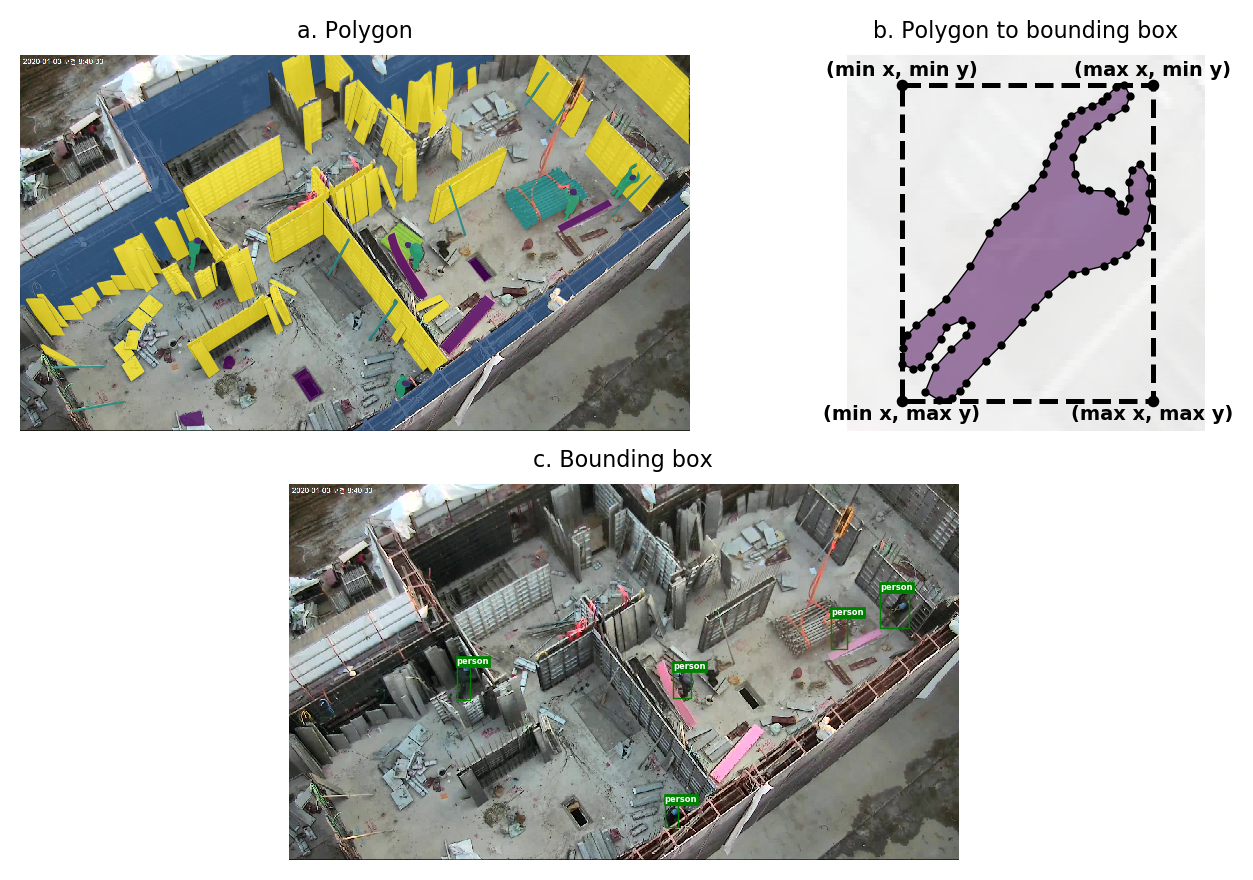

In [79]:
fig = plt.figure(figsize=(7,4.5), dpi=200)
gs = fig.add_gridspec(2, 5)

ax1 = fig.add_subplot(gs[0, :3])
draw_plot1(ax1)
ax1.set_title('a. Polygon', fontsize=8)
ax2 = fig.add_subplot(gs[0, 3:])
draw_plot2(ax2)
ax2.set_title('b. Polygon to bounding box', fontsize=8)
ax3 = fig.add_subplot(gs[1, 1:4])
draw_plot3(ax3)
ax3.set_title('c. Bounding box', fontsize=8)
fig.tight_layout()
fig.subplots_adjust(wspace=0.01, hspace=0.14)
plt.show()
fig.savefig('fig-04.png', bbox_inches='tight') # pad_inches

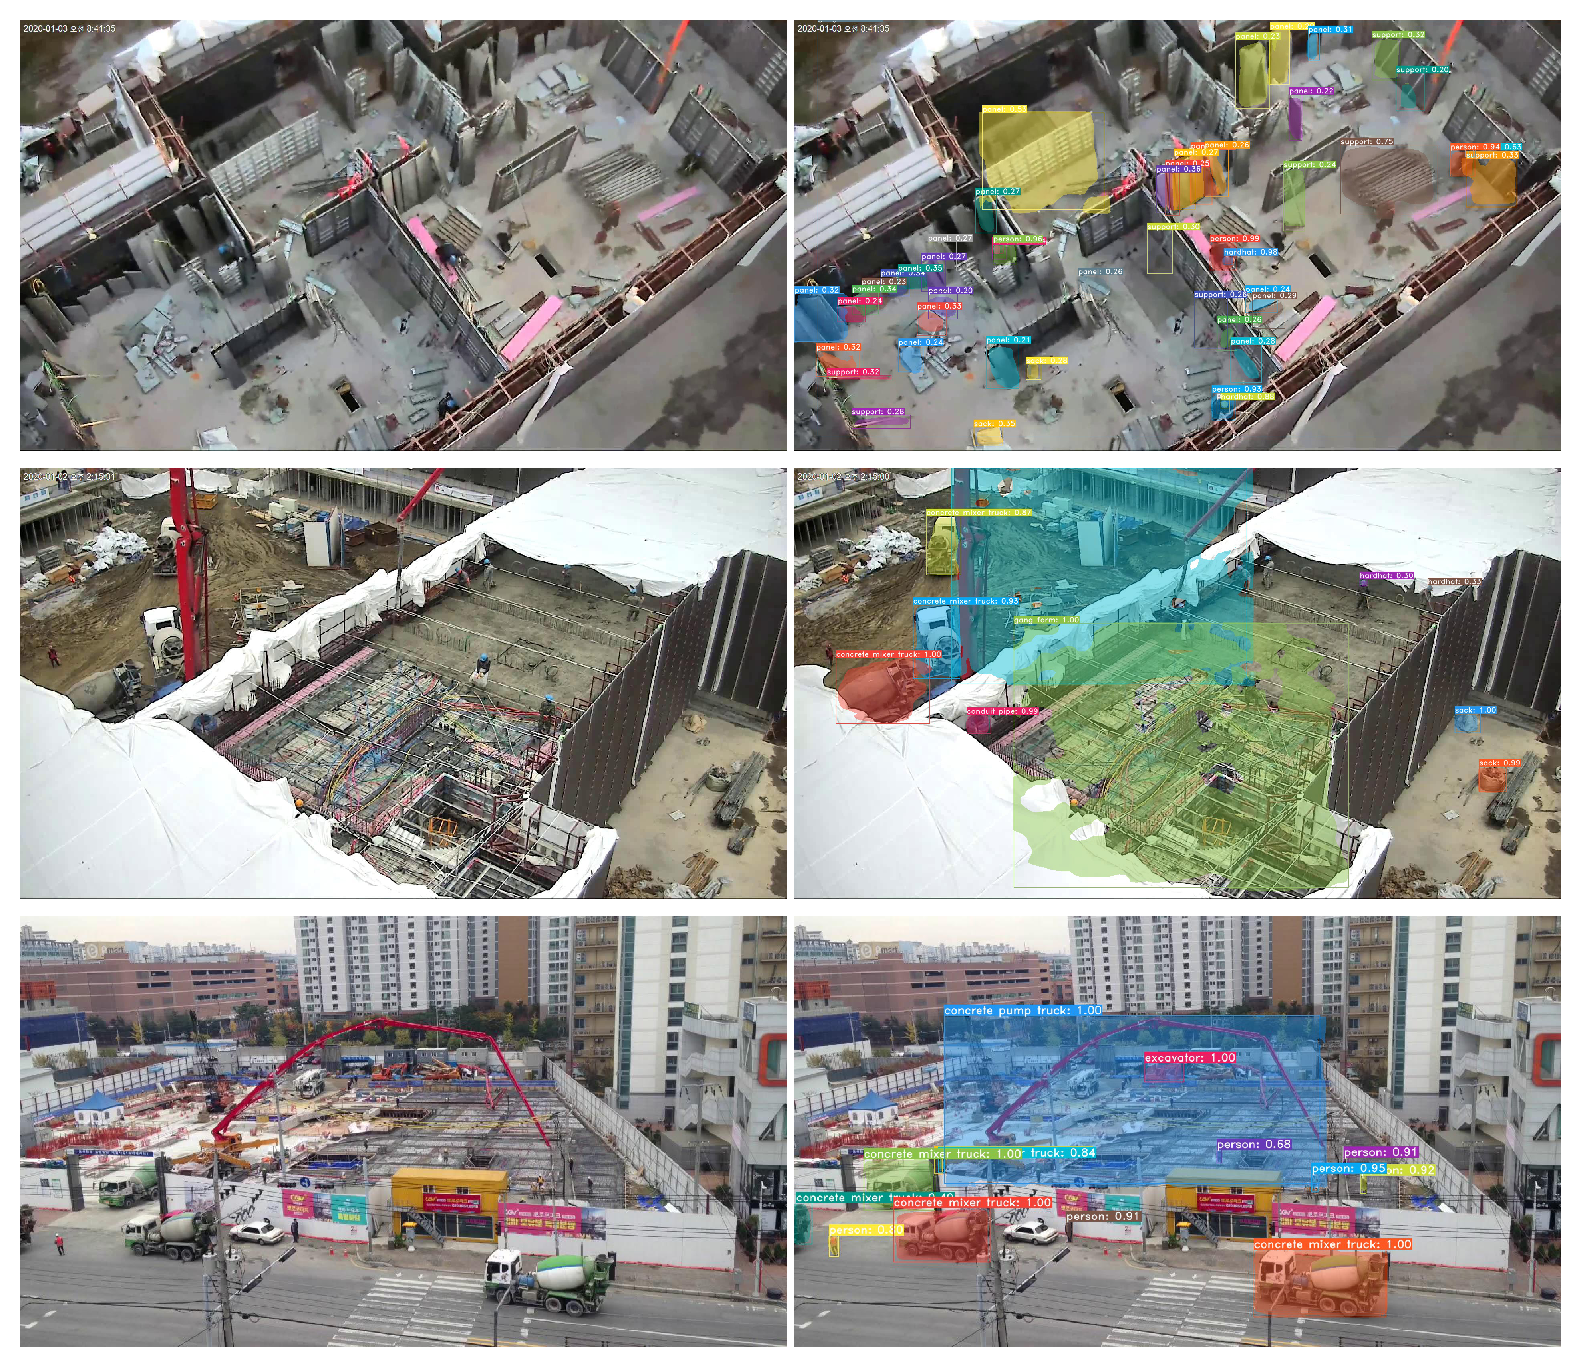

In [108]:
fig, axes = plt.subplots(3, 2, figsize=(8, 7), dpi=200)
images = ['10000002.jpg', '1.jpg', '10000052.jpg', '2.jpg', '00002400.jpg', '3.jpg']#, '00000634.jpg', '4.jpg']

for i, path in enumerate(images):
    image = Image.open(path).convert('RGB')
    image = image.resize((1920, 1080))
    axes.flat[i].imshow(image)
    axes.flat[i].axis('off')

fig.tight_layout()
fig.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()
fig.savefig('fig-16.png', bbox_inches='tight') # pad_inches

In [ ]:
fig = plt.figure(dpi=300, tight_layout=True)
ax = np.zeros(3, dtype=object)

gs = gridspec.GridSpec(2, 5) #, width_ratios=[2, 1, 2]) 




ax[0].imshow(img_seg)
# ax[1].imshow(crop_img) img_jjal
ax[1].imshow(img_jjal)
ax[2].imshow(new_img_seg)


ax[0].set_title('Polygon', fontsize=7)
ax[1].set_title('Polygon to Bounding Box', fontsize=7)
ax[2].set_title('Bounding Box and Polygon', fontsize=7)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

fig.tight_layout(pad=0.5)
fig.savefig('poly_to_box.png')
plt.show()


In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
patch= ax1.add_patch(patches.Rectangle((x, y), 0.5, 0.5,
    alpha=0.1,facecolor='red',label='Label'))

centerx = centery = x + 0.5/2 # obviously use a different formula for different shapes

plt.text(centerx, centery,'lalala')

In [ ]:
patches = []
colors = []
for polygon in polygons:
    if label == 'person':
        line = Line2D(
            np.asarray(point)[:,0], np.asarray(point)[:,1], 
            linewidth=0.5, markersize=0.5, marker='o', )#markeredgecolor='r')
        
    
        ax.add_line(line)

rectangles = []
for label, box in zip(labels, boxes):
    if label == 'person':
        rectangle = Rectangle((box[0], box[1]), box[2], box[3])
        rectangles.append(rectangle)
    
pc = PatchCollection(rectangles, edgecolor='g', facecolor='none')
ax.add_collection(pc)
# ax.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
boxes = []
for label, point, group_id in zip(labels, points, group_ids):
    if label not in ['support', 'gang form', 'euro form']:
        xs = []
        ys = []
        for x, y in point:
            xs.append(x)
            ys.append(y)
        x1, y1, x2, y2 = map(int, [min(xs), min(ys), max(xs), max(ys)])
        w, h = x2 - x1, y2 - y1
        boxes.append([x1, y1, w, h])


from collections import defaultdict

indices = sorted(range(len(group_ids)), key=lambda k: labels[k])
group_dict = defaultdict(list)
for i in indices:
    if labels[i] in ['support']:
        group_dict[group_ids[i]] += points[i]

for box in group_dict.values():
    xs = []
    ys = []      
    for x, y in box:
        xs.append(x)
        ys.append(y)
    x1, y1, x2, y2 = map(int, [min(xs), min(ys), max(xs), max(ys)])
    w, h = x2 - x1, y2 - y1
    boxes.append([x1, y1, w, h])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

image = plt.imread('00000138.jpg')
colors_dict = {label: np.random.randint(0, 255) for label in labels}
axes.ravel()[0].imshow(image)
axes.ravel()[1].imshow(image)

patches = []
colors = []
for label, point in zip(labels, points):
    polygon = Polygon(np.asarray(point), True)
    patches.append(polygon)
    colors.append(colors_dict[label])
    
pc = PatchCollection(patches, alpha=0.8)
pc.set_array(np.array(colors))
axes.ravel()[0].add_collection(pc)
axes.ravel()[0].axis('off')

pc = PatchCollection(patches, alpha=0.8)
pc.set_array(np.array(colors))
axes.ravel()[1].add_collection(pc)

rectangles = []
for label, p in zip(labels, boxes):
    rectangle = Rectangle((p[0], p[1]), p[2], p[3])
    rectangles.append(rectangle)
    
pc = PatchCollection(rectangles, edgecolor='r', facecolor='none')
axes.ravel()[1].add_collection(pc)
axes.ravel()[1].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(dpi=300)

image = plt.imread('00000138.jpg')
ax.imshow(image)

patches = []
colors = []
for label, point in zip(labels, points):
    if label == 'person':
        line = Line2D(
            np.asarray(point)[:,0], np.asarray(point)[:,1], 
            linewidth=0.5, markersize=0.5, marker='o', )#markeredgecolor='r')
        
    
        ax.add_line(line)

rectangles = []
for label, box in zip(labels, boxes):
    if label == 'person':
        rectangle = Rectangle((box[0], box[1]), box[2], box[3])
        rectangles.append(rectangle)
    
pc = PatchCollection(rectangles, edgecolor='g', facecolor='none')
ax.add_collection(pc)
# ax.axis('off')

fig.tight_layout()
plt.show()